In [5]:
from importlib import reload

import numpy as np
from matplotlib import pyplot as plt

import spectrum_painting as sp
import spectrum_painting_data as sp_data
import spectrum_painting_plotting as sp_plot

(256, 256)


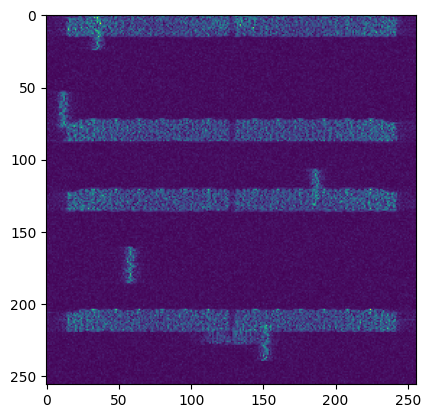

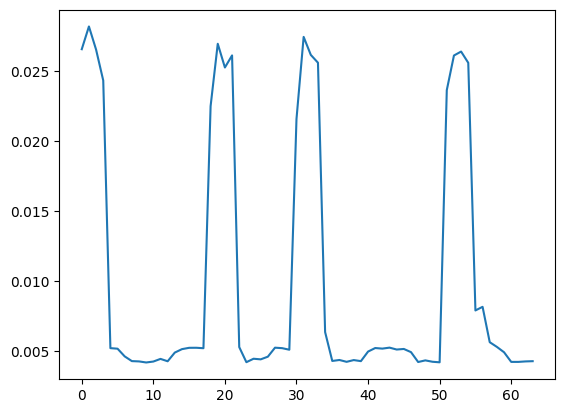

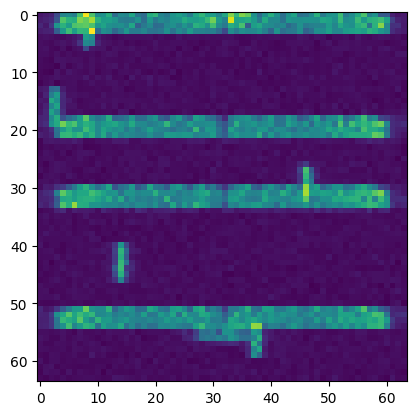

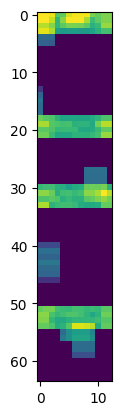

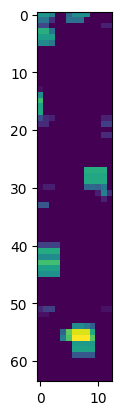

In [36]:
# Reload spectrum painting module in case the code changed
# and you want what is executed to be what you wrote.
reload(sp_data)
reload(sp_plot)
reload(sp)

spectrograms = sp_data.load_spectrograms(data_dir="data/numpy",
                                         classes=["ZBW"],
                                         snr_list=[10],
                                         windows_per_spectrogram=256,
                                         window_length=256,
                                         nfft=256)

spec = spectrograms.get(10)[0]
print(spec.values.shape)

plt.imshow(spec.values)
plt.show()

# middle = (spec.values.shape[1]) // 2

# spec = sp.take_frequencies(spec, middle - 32, middle + 32).values

downsampled = sp.downsample_spectrogram(spectrogram=spec.values, resolution=64)

plt.plot(np.mean(downsampled, axis=1))
plt.show()

plt.imshow(downsampled)
plt.show()

augmented = sp.augment_spectrogram(spectrogram=downsampled, k=3, l=16, d=4)
plt.imshow(augmented)
plt.show()

painted = sp.paint_spectrogram(original=downsampled, augmented=augmented)
plt.imshow(painted)
plt.show()